In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check the shape of the data
print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape:  (50000, 32, 32, 3)
Test data shape:  (10000, 32, 32, 3)


In [3]:
# Define data augmentation generator
datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit the generator to training data
datagen.fit(X_train)


In [4]:
# Build a simple feedforward convolutional neural network
model = Sequential()

# First Conv2D layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv2D layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected Dense layer
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model using data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 126ms/step - accuracy: 0.3559 - loss: 1.7741 - val_accuracy: 0.5442 - val_loss: 1.2733
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.5200 - loss: 1.3414 - val_accuracy: 0.6133 - val_loss: 1.1114
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 121ms/step - accuracy: 0.5839 - loss: 1.1811 - val_accuracy: 0.6471 - val_loss: 1.0152
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.6110 - loss: 1.1069 - val_accuracy: 0.6648 - val_loss: 0.9651
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.6335 - loss: 1.0432 - val_accuracy: 0.6833 - val_loss: 0.9246
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.6512 - loss: 1.0008 - val_accuracy: 0.6801 - val_loss: 0.9200
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 123ms/step - accuracy: 0.6671 - loss: 0.9578 - val_accuracy: 0.6905 - val_loss: 0.9037
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.6799 - loss: 0.9099 -

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7209 - loss: 0.8131
Test Accuracy: 71.79%


In [10]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Confusion Matrix:
 [[758  30  46  11  28   4  16  22  46  39]
 [ 10 867   6   6   1   4  18   8  16  64]
 [ 47  12 539  39  88  73 123  55  14  10]
 [ 13  13  41 408  85 160 179  65  15  21]
 [  9   3  47  24 688  22 116  79   8   4]
 [  8   4  33 115  55 599  88  81   9   8]
 [  3   3  25  20  24   9 904   8   3   1]
 [ 10   4  19  15  49  53  24 818   2   6]
 [ 60  47  10   7  16   8   8  12 805  27]
 [ 24 103   8   8   9   6  13  21  15 793]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1000
           1       0.80      0.87      0.83      1000
           2       0.70      0.54      0.61      1000
           3       0.62      0.41      0.49      1000
           4       0.66      0.69      0.67      1000
           5       0.64      0.60      0.62      1000
           6       0.61      0.90      0.73      1000
           7       0.70      0.82      0.75      10

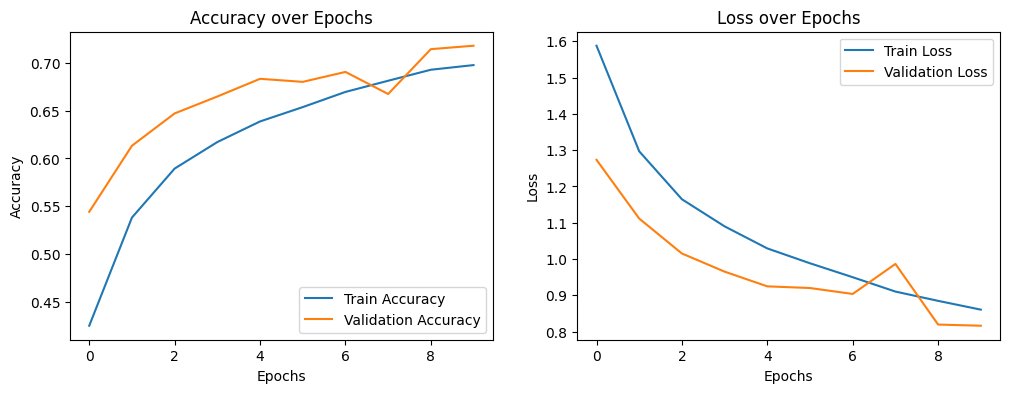

In [11]:
# Plot training & validation accuracy over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
